In [1]:
import numpy as np
from scipy.special import assoc_laguerre
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from numpy import pi
from matplotlib import cm, colors
import ipywidgets as widgets
from IPython.display import display, clear_output

## <span style="color:#F6A800"> **I.** Schrödinger equation in central field </span>

In spherical coordinates, the time-dependent Schrödinger equation for one electron reads:

$$ \hat{H} \Psi(r, \theta, \phi) = E \Psi(r, \theta, \phi) $$
$$ -\frac{\hbar^2}{2\mu} \Biggl( \frac{1}{r^2} \frac{\partial}{\partial r} \bigl( r^2 \frac{\partial \Psi(r,\theta,\phi)}{\partial r} \bigl) - \frac{1}{\hbar^2 r^2} \hat{L}^2 \Psi(r,\theta,\phi) \Biggl) + V(r) \Psi(r,\theta,\phi) = E \; \Psi(r,\theta,\phi)$$ 

We rearrange the equation,

$$  -\frac{\hbar^2}{2\mu} \Biggl( \frac{1}{r^2} \frac{\partial}{\partial r} \bigl( r^2 \frac{\partial \Psi(r,\theta,\phi)}{\partial r} \bigl) - \frac{1}{\hbar^2 r^2} \hat{L}^2 \Psi(r,\theta,\phi) \Biggl) = \Biggl( E - V(r) \Biggl) \Psi(r,\theta,\phi)$$

and divide by $\frac{\hbar^2}{(2 \mu r^2)}$:

$$ - \frac{\partial}{\partial r} \bigl( r^2 \frac{\partial \Psi(r,\theta,\phi)}{\partial r} \bigl) + \frac{1}{\hbar^2} \hat{L}^2 \Psi(r,\theta,\phi) = \frac{2 \mu r^2}{\hbar^2} \Biggl( E - V(r) \Biggl) \Psi(r,\theta,\phi) $$

As shown in the lecture, it is useful to separate the wave function of the Hydrogen atom into radial and angular parts:

$$ \boxed{\Psi(r, \theta, \phi) = R_{n,l}(r) \cdot Y_l^{m_l}(\theta, \phi) \; }$$

We use this ansatz for the above equation. Please note that $R_{n,l}(r)$ does not depend on the angles $\theta$ and $\phi$. Hence, the function $R_{n,l}(r)$ behaves like a constant for the derivative with respect to the angles. The same applies for the spherical harmonics $ Y_l^{m_l}(\theta, \phi)$, which are constant with respect to the radius $r$.

In the end, we have:

$$ -Y_l^{m_l}(\theta, \phi) \frac{\partial}{\partial r} \Biggl( r^2 \frac{\partial R_{nl}(r)}{\partial r} \Biggl)+ \frac{R_{nl}(r)}{\hbar^2} \hat{L}^2 Y_l^{m_l}(\theta, \phi) =  \frac{2 \mu r^2}{\hbar^2} \Biggl( E - V(r) \Biggl) R_{n,l}(r) \cdot Y_l^{m_l}(\theta, \phi) $$

<br>


We separate the equation in all terms depending on $\theta$ and $\phi$ (left hand side) and depending on the radius $r$ (right hand side), yielding:

$$ \frac{1}{\hbar^2 Y_l^{m_l}(\theta, \phi)}\hat{L}^2 Y_l^{m_l}(\theta, \phi) = \frac{1}{R_{n,l}(r)} \frac{\partial}{\partial r} \Biggl( r^2 \frac{\partial R_{nl}(r)}{\partial r} \Biggl) +  \frac{2 \mu r^2}{\hbar^2} \Biggl( E - V(r) \Biggl)$$

Since both sides have to equal for all $r$, $\theta$ and $\phi$, they are constant. Solving the right hand side yields the radial part of the wave function, which we have a look at in section II. Solving the left hand side yields the spherical harmonics, which we consider in section III.



## <span style="color:#F6A800"> **II.** Radial function of hydrogen </span>

The radial function $R_{n,l}(r) = \frac{u(r)}{r} = \frac{r^{l+1}}{r} \; e^{- \alpha r} \; w(r) = r^l \; e^{- \alpha r} \; w(r)$ is composed of the individual factors. If you are interested in the details, please have a look at the bonus section IV.

In [ ]:
a0 = 0.529177 # Bohr radius in nm

def r_axis():
    rmax = 13
    r = np.linspace(0.0,rmax,500)
    return rmax,r  

def Laguerre(x, n, l ):
    p = 2*l+1
    q = n + l
    
    # scipy function
    Laguerre = assoc_laguerre(x,q-p,p)
    return Laguerre

def norm(n,l):
    # normalization of the wave function
    alpha = 1./ (n * a0)
    norm = np.sqrt( (2*alpha)**3 * np.math.factorial(n-l-1) / (2.0*n*np.math.factorial(n+l)**3 ) ) * np.math.factorial(n+l)
    return norm

def Rfunction(r,n,l):
    alpha = 1./ (n * a0)    
    x = 2 * r * alpha
    return norm(n,l) * (x)**l * np.exp(-0.5*x) * Laguerre(x,n,l)
    
def plot_Rfunction(n,l):
    rmax, r = r_axis()
    y = Rfunction(r,n,l)
    
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size':12})
    plt.plot(r, y, linewidth=2,label=r"$R_{n,l}(r)$")
    plt.hlines(0.,0.,rmax,linewidth=3,colors='black',linestyles='dotted')
    plt.xlabel(r"$r/a_0$")
    plt.ylabel(r"$R_{n,l}(r)$")
    plt.xlim([0,rmax])
    plt.grid()
    clear_output(wait=True)
            
Rnl = widgets.interactive(plot_Rfunction, \
                          n=widgets.IntSlider(min=1, max=4, step=1, value=1, description="$n$"), \
                          l=widgets.IntSlider(min=0, max=3, step=1, value=0, description="$l$") \
                          )
display(Rnl)               


Inserting the radial component $R_{nl}(r)$ into the right hand side equation 

$$\frac{1}{R_{n,l}(r)} \frac{\partial}{\partial r} \Biggl( r^2 \frac{\partial R_{nl}(r)}{\partial r} \Biggl) +  \frac{2 \mu r^2}{\hbar^2} \Biggl( E - V(r) \Biggl) = \rm const$$ 

and simplifying, after a few pages of equations, we get

$$ E = -\frac{\hbar^2}{2\mu} \alpha^2 $$

We see that
* the energy $E$ must have a negative value and therefore describes a bound state, since $\hbar$, $\alpha^2$ and $\mu$ are positive values.
* The more negative $E$ is, the stronger is the damping of the radial component in the exponential part and thus the effect is "short-range".

In order to solve the above differential equation exactly, the potential energy can only correspond to a pure Coulomb potential, _i.e._,
$$V(r) = -\frac{1}{4\pi \epsilon_0} \cdot \frac{Z e \cdot e}{r}$$

This is of course the case for the hydrogen atom with one proton and one electron. Another, more exotic example would be He$^+$. Here the nuclear charge number is $Z=2$.

### <span style="color:#F6A800"> **II.1** Radial probability density of the electron in the hydrogen atom </span>

To determine the spatial probability density of the electron in the vicinity of the hydrogen nucleus up to a determined radius $r_{\rm max}$, we need to spherically integrate $R_{n,l}^*(r) \cdot R_{n,l}(r)$:

$$ P(r_{max}) = \int\limits_0^{r_{\rm max}} 4\pi r^2 R_{n,l}^*(r) \cdot R_{n,l}(r) dr$$

Let's take a closer look at the function to be integrated $4\pi r^2 R_{n,l}^*(r) \cdot R_{n,l}(r)$.

In [ ]:
def plot_r2R2(n,l):
    rmax, r = r_axis()
    tmp = Rfunction(r,n,l)
    y = 4 * np.pi * r**2 * tmp**2
    
    rav = a0*n**2*(1+ (n**2-l*(l+1)) / (2*n**2))
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size':12})
    lname = ["s","p","d","f"]
    plt.plot(r, y, linewidth=2,label=r"%i%s"%(n,lname[l]))
    plt.fill(r, y, alpha=0.1)
    plt.hlines(0.,0.,rmax,linewidth=3,colors='black',linestyles='dotted')
    plt.vlines(rav, 0.0, rmax, colors='black',linestyles='dotted')
    plt.xlabel(r"$r/a_0$")
    plt.ylabel(r"$4 \pi r^2 R_{n,l}^2(r)$")
    plt.title(r"$4 \pi r^2 R_{%i,%i}^2(r)$"%(n,l))
    plt.xlim([0,rmax])
    plt.grid()
    plt.legend()
    clear_output(wait=True)
            
r2R2 = widgets.interactive(plot_r2R2,
                                   n=widgets.IntSlider(min=1, max=3, step=1, value=1, description="$n$"),
                                   l=widgets.IntSlider(min=0, max=2, step=1, value=0, description="$l$") )
display(r2R2) 

### <span style="color:#F6A800"> **II.2** Comparison of 2s and 2p </span>

Now we want to compare the radial component for the 2s and 2p orbitals.

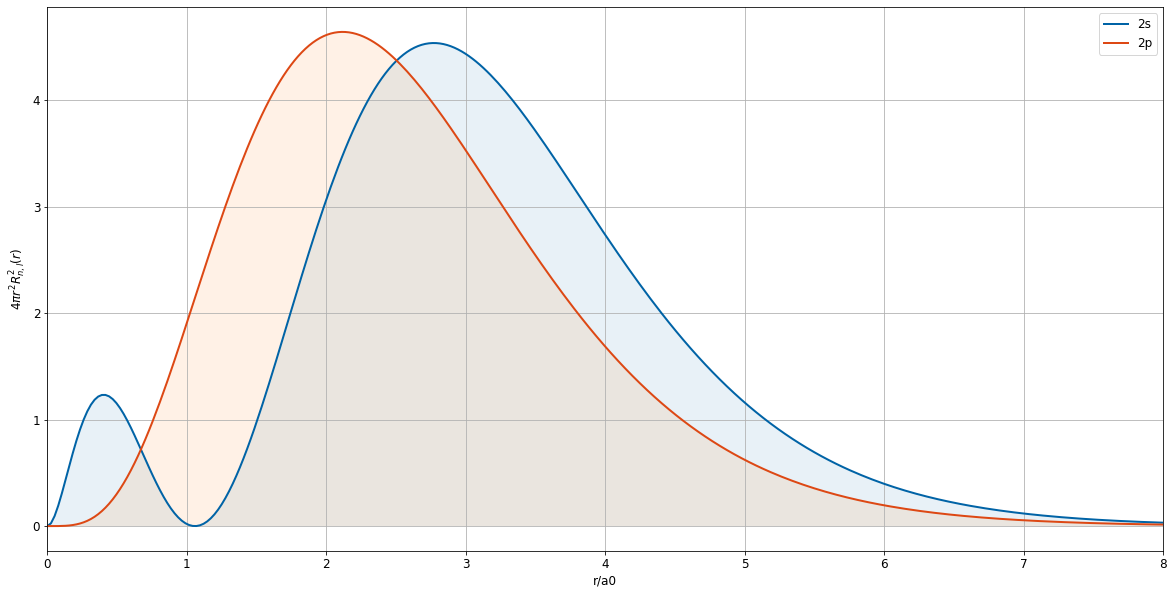

In [4]:
rmax, r = r_axis()
y2s = 4 * np.pi * r**2 * Rfunction(r,2,0)**2
y2p = 4 * np.pi * r**2 * Rfunction(r,2,1)**2

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':12})

plt.plot(r, y2s, linewidth=2,label=r"2s",color="#0063A6")
plt.fill(r, y2s, alpha=0.1)

plt.plot(r, y2p, linewidth=2,label=r"2p",color="#DD4814")
plt.fill(r, y2p, alpha=0.1)

plt.xlabel("r/a0")
plt.ylabel(r"$4 \pi r^2 R_{n,l}^2(r)$")
plt.xlim([0,8])
plt.grid()
plt.legend()
plt.show()


### <span style="color:#F6A800"> **III.3** Comparison of 3s, 3p and 3d</span>

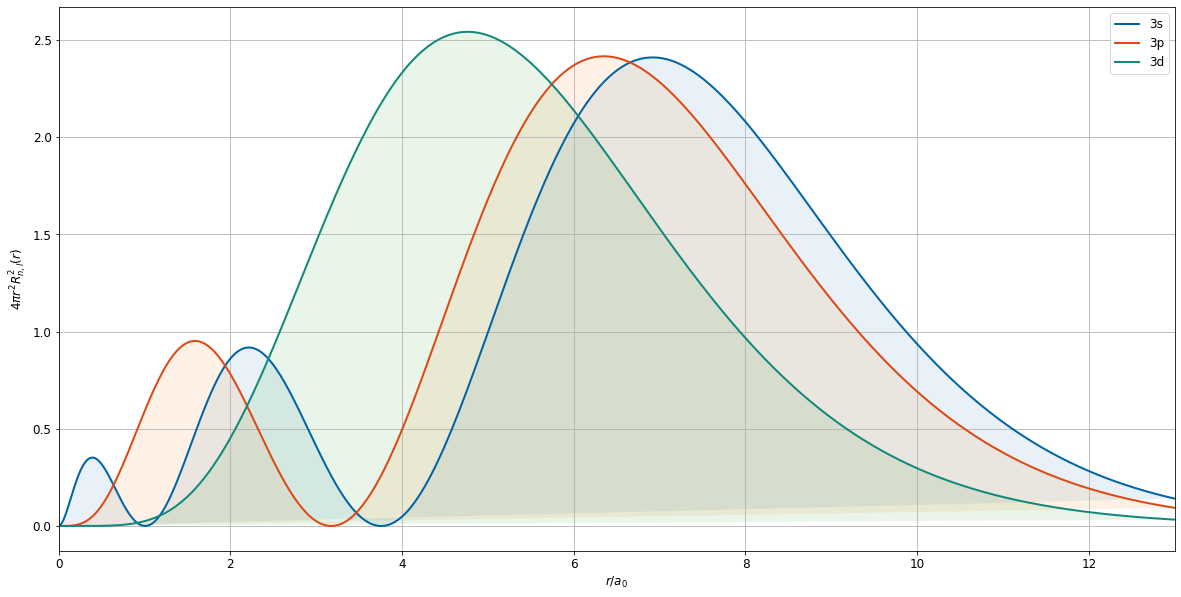

In [5]:
rmax, r = r_axis()
y3s = 4 * np.pi * r**2 * Rfunction(r,3,0)**2
y3p = 4 * np.pi * r**2 * Rfunction(r,3,1)**2
y3d = 4 * np.pi * r**2 * Rfunction(r,3,2)**2

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':12})

plt.plot(r, y3s, linewidth=2,label=r"3s",color="#0063A6")
plt.fill(r, y3s, alpha=0.1)

plt.plot(r, y3p, linewidth=2,label=r"3p",color="#DD4814")
plt.fill(r, y3p, alpha=0.1)

plt.plot(r, y3d, linewidth=2,label=r"3d",color="#11897A")
plt.fill(r, y3d, alpha=0.1)

plt.xlabel(r"$r/a_0$")
plt.ylabel(r"$4 \pi r^2 R_{n,l}^2(r)$")
plt.xlim([0,rmax])
plt.grid()
plt.legend()
plt.show()

## <span style="color:#F6A800"> **III.** Spherical harmonics </span>
### <span style="color:#F6A800"> **III.1.** Definition of the coordinate system </span>

Now we define a function that can plot the spherical harmonics or the orbital in three dimensions. 

In [6]:
# Plotting orbital/spherical harmonics functions
def plot(R,name,theta,phi):
    # conversion to Cartesian coordinates (see slide 2 of chapter 2.2)
    X = R * np.sin(theta) * np.cos(phi)
    Y = R * np.sin(theta) * np.sin(phi)
    Z = R * np.cos(theta)

    #Plot
    cmap=plt.get_cmap('jet')
    norm = colors.Normalize(vmin=Z.min(), vmax=Z.max())
    
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('jet'), facecolors=cmap(norm(R)), shade=True)
    
    ax.set_xlim([-0.45,0.45])
    ax.set_ylim([-0.45,0.45])
    ax.set_zlim([-0.45,0.45])
    
    ax.set_title(name)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    clear_output(wait=True)

### <span style="color:#F6A800"> **III.2.** Complex spherical harmonics </span>

First, we look at the complex spherical harmonics $Y_{l}^{m_l}(\theta,\phi)$ as obtained from solving the angular part of the hydrogen wave functions. The azimuth angle $\phi$ takes values from 0° to 360° and the polar angle $\theta$ takes values from 0° to 180°. 

In [ ]:
def complexY(l=1,ml=0):
    #Create mesh from polar coordinates.
    #Increase the number (currently 500) to have a more detailed but slower picture.
    phi = np.linspace(0, (2 * pi), 500)
    theta = np.linspace(0, (pi), 500)
    phi, theta = np.meshgrid(phi, theta)

    Y = sph_harm(ml, l, phi, theta) #swap bc in sph_harm phi=theta and theta=phi
    plot(abs(Y),r'Spherical Harmonics, $Y_l^m(\theta,\phi)$'+r', $l=$'+str(l)+r', $m_l=$'+str(ml),theta,phi)

Y_interact = widgets.interactive(complexY, \
                                 l=widgets.IntSlider(min=0, max=3, step=1, value=1, \
                                 description="$l$ value"), \
                                 ml=widgets.IntSlider(min=-3, max=3, step=1, value=0, description="$m_l$ value") \
                                 )
display(Y_interact)

##  <span style="color:#F6A800"> **III.3.** $p$-orbitals as a linear combination of spherical harmonics </span>

All $p$-orbitals have the value $l=1$. 
The dumbbell shape of the $2p_z$-orbital follows from the spherical harmonics function $Y_l^{m_l}(\theta,\phi)$ with $m_l =0$, thus $Y_0^1(\theta,\phi)$.


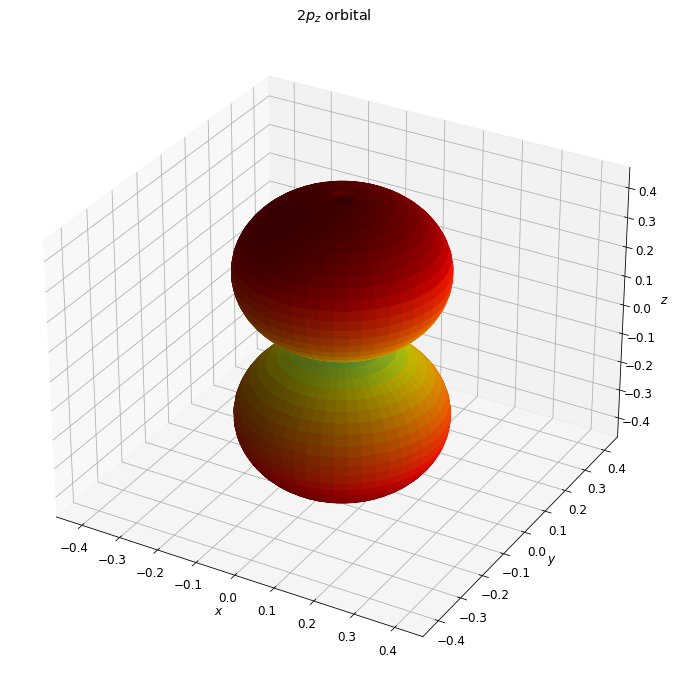

In [8]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
 
l=1
ml=0
pz = sph_harm(ml,l,phi,theta)    
plot(abs(pz),r'$2p_z$ orbital',theta,phi)  

This orbital can also be obtained in the above cell with the sliders using $l=1$ and $m_l=0$.

For the dumbbell shape of the $2p_x$ and the $2p_y$ orbital, the spherical harmonics functions must now be combined:

$2p_{x\, ({\rm angular})} = -\frac{1}{\sqrt{2}} \Bigl( Y_1^1(\theta,\phi) - Y_1^{-1}(\theta,\phi) \Bigl)$

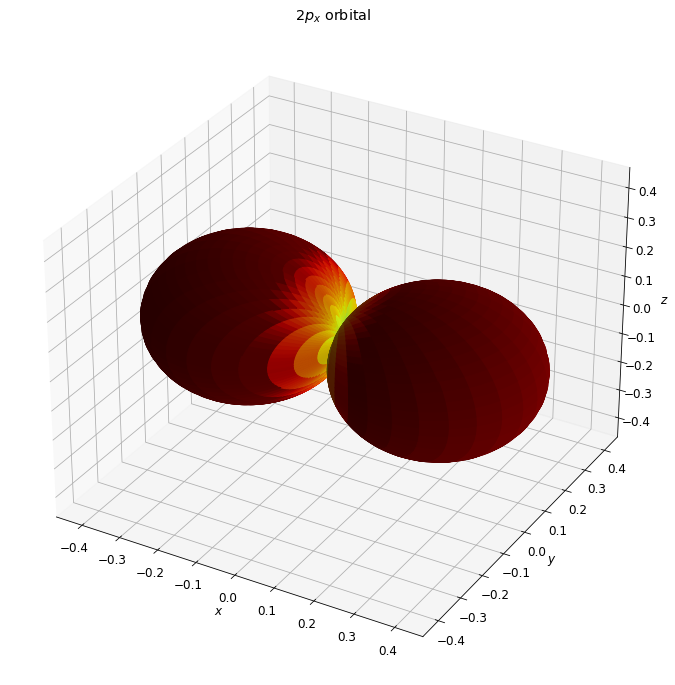

In [9]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
      
l = 1
px = -1.0/np.sqrt(2) * ( sph_harm(1,l,phi,theta) - sph_harm(-1,l,phi,theta) )
plot(abs(px),r'$2p_x$ orbital',theta,phi)  

For the $2p_y$ orbital, it is the following combination:

$2p_{y\, ({\rm angular})} = \frac{i}{\sqrt{2}} \Bigl( Y_1^1(\theta,\phi) + Y_1^{-1}(\theta,\phi) \Bigl)$

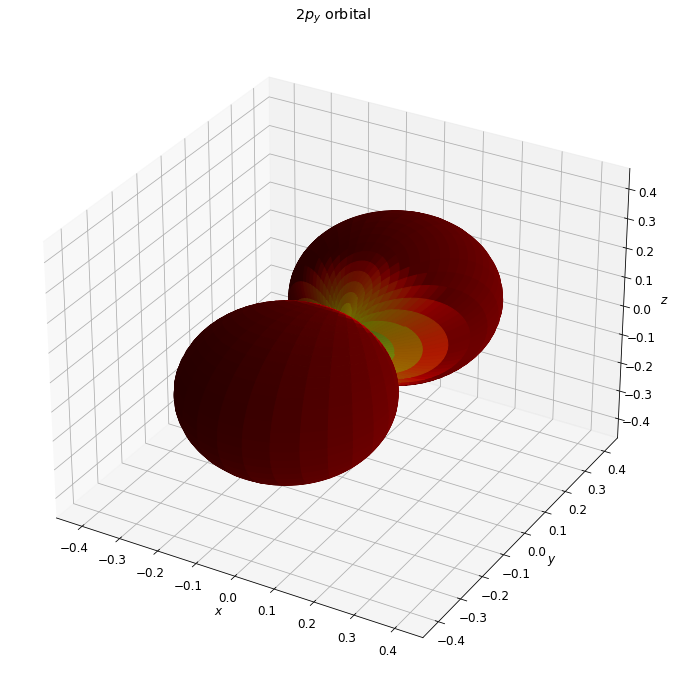

In [10]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
      
l = 1
py = 1j/np.sqrt(2) * ( sph_harm(1,l,phi,theta) + sph_harm(-1,l,phi,theta) )
plot(abs(py),r'$2p_y$ orbital',theta,phi) 

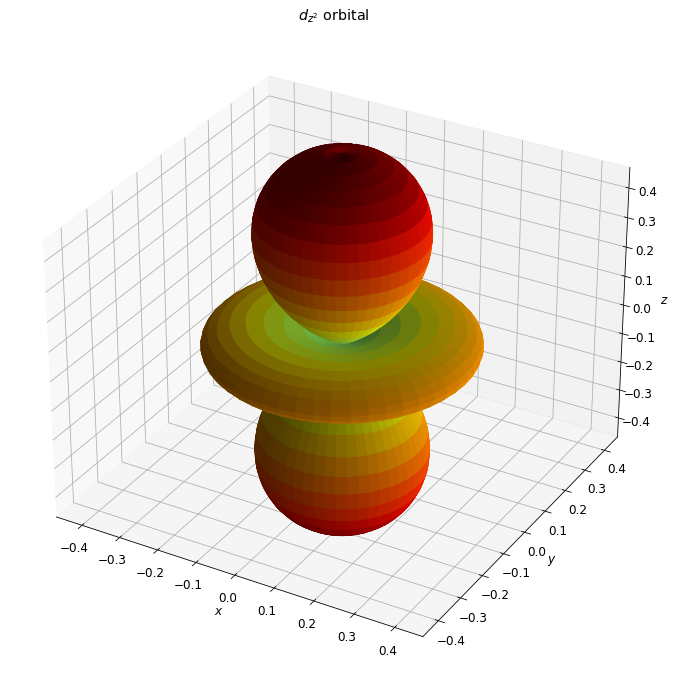

In [11]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
    
l = 2
dz2 = sph_harm(0,l,phi,theta) 
plot(abs(dz2),r'$d_{z^2}$ orbital',theta,phi) 

For all further $d$-orbitals we again need combinations of the spherical harmonics:

$d_{yz\, ({\rm angular})} = -\frac{1}{\sqrt{2}} \Bigl( Y_2^1(\theta,\phi) - Y_2^{-1}(\theta,\phi)\Bigl)$

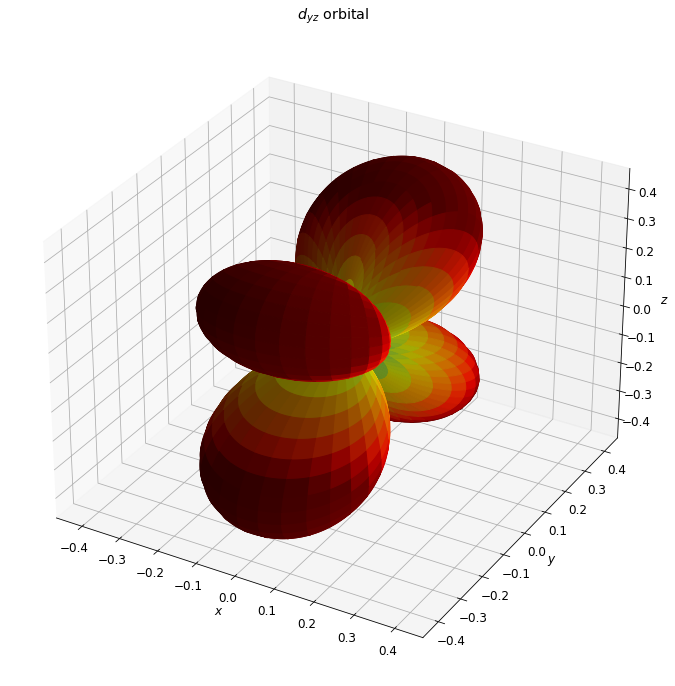

In [12]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
    
l = 2
dyz = -1/np.sqrt(2) * ( sph_harm(1,l,phi,theta) + sph_harm(-1,l,phi,theta) )
plot(abs(dyz),r'$d_{yz}$ orbital',theta,phi) 

This orbital is aligned along the bisector of the $y$ and $z$ axes.
Now the next $d$ orbital:

$d_{xz\, ({\rm angular})} = \frac{i}{\sqrt{2}} \Bigl( Y_2^1(\theta,\phi) + Y_2^{-1}(\theta,\phi)\Bigl)$


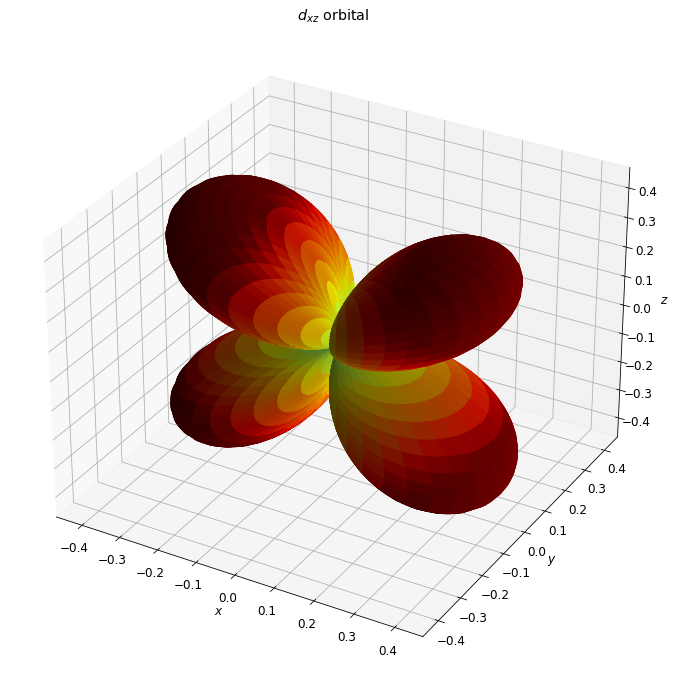

In [13]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
        
l = 2
dxz = 1j/np.sqrt(2) * ( sph_harm(1,l,phi,theta) - sph_harm(-1,l,phi,theta) )
plot(abs(dxz),r'$d_{xz}$ orbital',theta,phi) 

This orbital is aligned along the bisector of the $x$ and $z$ axes. Now to the next orbital:

$d_{x^2-y^2 \, ({\rm angular})} = - \frac{1}{\sqrt{2}} \Bigl( Y_2^2(\theta,\phi) + Y_2^{-2}(\theta,\phi) \Bigl)$


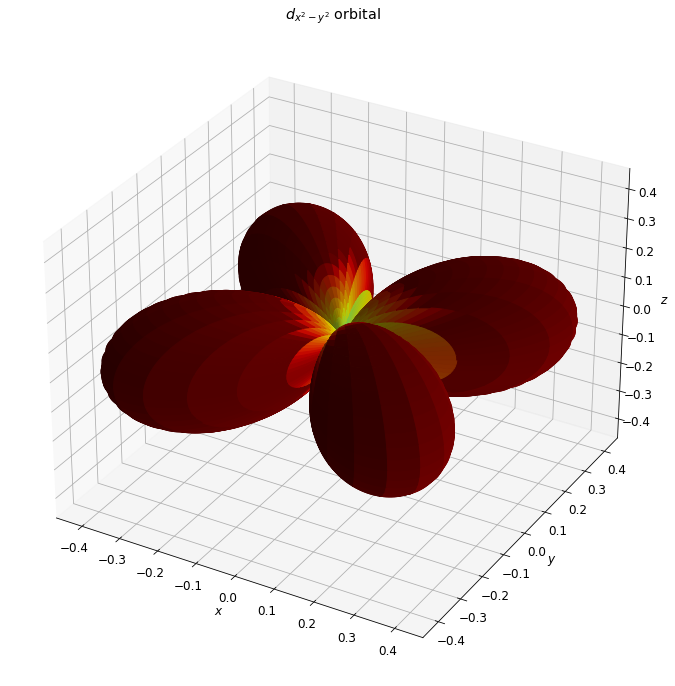

In [14]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
       
l = 2
dx2y2 = -1/np.sqrt(2) * ( sph_harm(2,l,phi,theta) - sph_harm(-2,l,phi,theta) )
plot(abs(dx2y2),r'$d_{x^2-y^2}$ orbital',theta,phi) 

This orbital is aligned along the bisector between $x$ axis and $y$ axis. Now to the next $d$ orbital

$d_{xy\, ({\rm angular})} = \frac{i}{\sqrt{2}} \Bigl( Y_2^2(\theta,\phi) + Y_2^{-2}(\theta,\phi) \Bigl)$


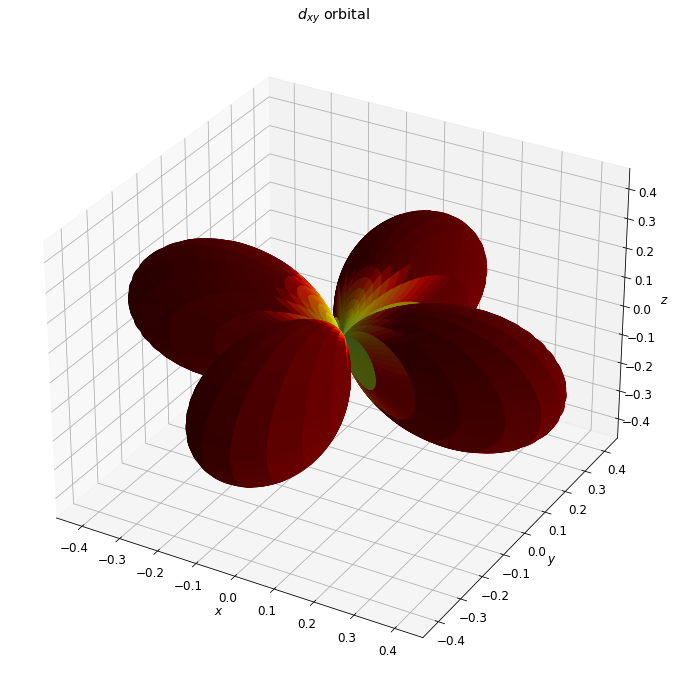

In [15]:
#Create mesh from polar coordinates.
#Increase the number (currently 500) to have a more detailed but slower picture.
phi = np.linspace(0, (2 * pi), 500)
theta = np.linspace(0, (pi), 500)
phi, theta = np.meshgrid(phi, theta)
       
l = 2
dxy = 1j/np.sqrt(2) * ( sph_harm(2,l,phi,theta) + sph_harm(-2,l,phi,theta) )
plot(abs(dxy),r'$d_{xy}$ orbital',theta,phi) 


This orbital is aligned along the $x$ and $y$ axes.

In [ ]:
def x_axis():
    x = np.linspace(0.05,10.0,200)
    return x    

def plot_Laguerre(n,l):
    x = x_axis()
    y = Laguerre(x, n, l)
    
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size':12})
    plt.plot(x, y, linewidth=2)
    plt.xlabel("$r$")
    plt.ylabel("$w(r)$")
    plt.xlim([0,10])
    plt.ylim([-10,20]) 
    plt.grid()
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(-10, 20, step=2))
    plt.title("associated Laguerre polynomials w(r)")
    clear_output(wait=True)
    
wpolynom = widgets.interactive(plot_Laguerre, \
                               n=widgets.IntSlider(min=1, max=3, value=1, description="$n$"), \
                               l=widgets.IntSlider(min=0, max=2, value=0, description="$l$") \
                               )

display(wpolynom)